# Logistic Regression vs MLP 진행하기. 

1. Data Generation


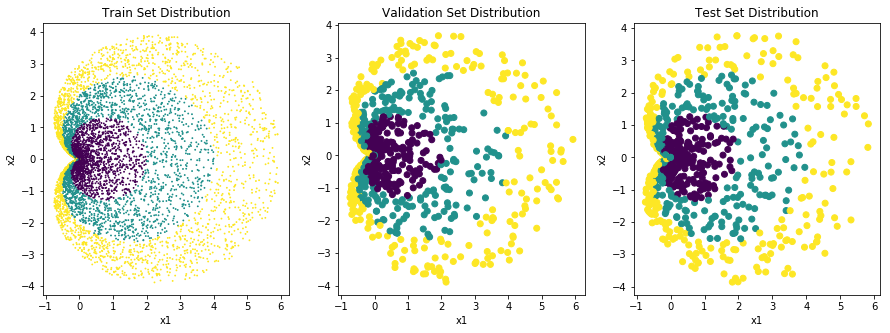

In [57]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

r = np.random.rand(10000) * 3
theta = np.random.rand(10000) * 2 * np.pi
y = r.astype(int)
r = r * (np.cos(theta) + 1)
x1 = r * np.cos(theta)
x2 = r * np.sin(theta)
X = np.array([x1, x2]).T

train_X, train_y = X[:8000, :], y[:8000]
val_X, val_y = X[8000:9000, :], y[8000:9000]
test_X, test_y = X[9000:, :], y[9000:]

fig = plt.figure(figsize=(15, 5))
ax1 = fig.add_subplot(1, 3, 1)
ax1.scatter(train_X[:, 0], train_X[:, 1], c=train_y, s=0.7)
ax1.set_xlabel('x1')
ax1.set_ylabel('x2')
ax1.set_title('Train Set Distribution')

ax2 = fig.add_subplot(1, 3, 2)
ax2.scatter(val_X[:, 0], val_X[:, 1], c=val_y)
ax2.set_xlabel('x1')
ax2.set_ylabel('x2')
ax2.set_title('Validation Set Distribution')

ax3 = fig.add_subplot(1, 3, 3)
ax3.scatter(test_X[:, 0], test_X[:, 1], c=test_y)
ax3.set_xlabel('x1')
ax3.set_ylabel('x2')
ax3.set_title('Test Set Distribution')

plt.show()


2. 함수 작성하기

In [58]:
import torch
import torch.nn as nn

class LinearModel(nn.Module):
    def __init__(self):
        super(LinearModel, self).__init__()
        self.linear = nn.Linear(2, 3, bias=True)
        
    def forward(self, x):
        x = self.linear(x)
        return x
    
class MLPModel(nn.Module):
    def __init__(self):
        super(MLPModel, self).__init__()
        self.linear1 = nn.Linear(2, 200)
        self.linear2 = nn.Linear(200, 3)
        self.relu = nn.ReLU()
        
    def forward(self, x):
        x = self.linear1(x)
        x = self.relu(x)
        x = self.linear2(x)
        return x
    

In [59]:
criterion = nn.CrossEntropyLoss()
#test_pred_y = torch.tensor([[1, 0], [0, 1]], dtype=torch.float)
#test_true_y1 = torch.tensor([1, 0], dtype=torch.long)
#test_true_y2 = torch.tensor([0, 1], dtype=torch.long)
#print(criterion(test_pred_y, test_true_y1))
#print(criterion(test_pred_y, test_true_y2))

3. Train & Evaluation.

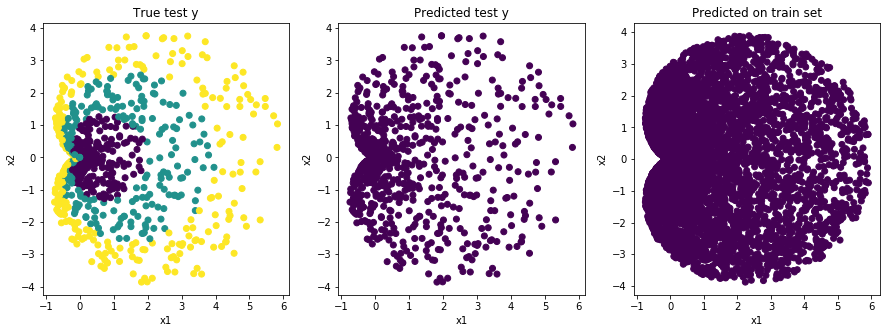

Epoch 0, Accuracy 0.32%


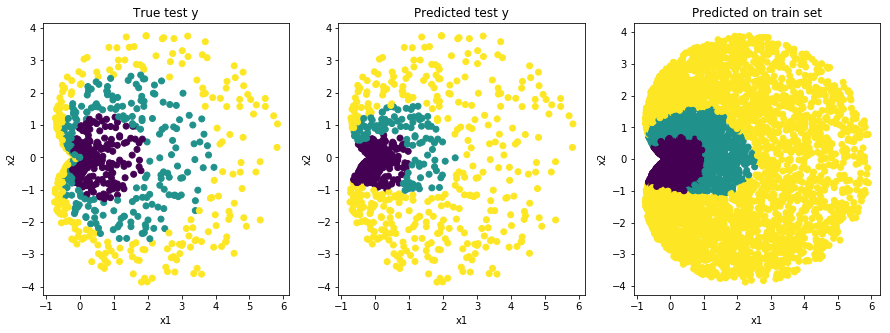

Epoch 200, Accuracy 0.56%


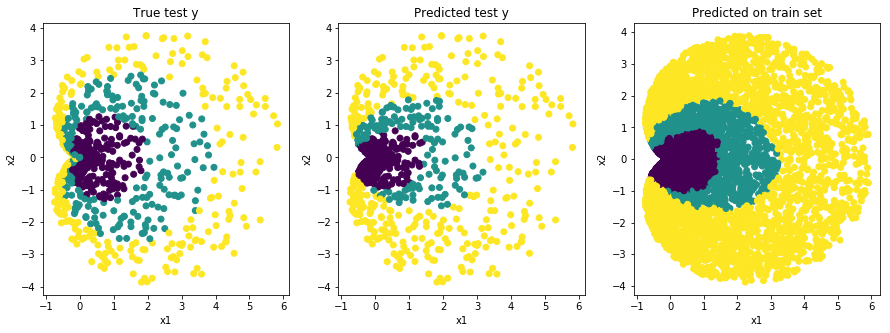

Epoch 400, Accuracy 0.63%


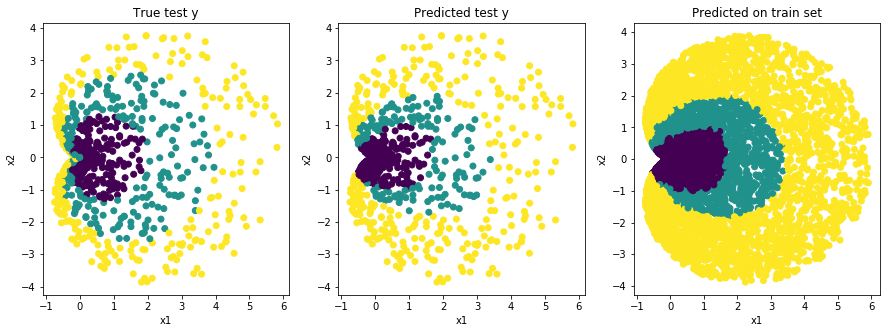

Epoch 600, Accuracy 0.66%


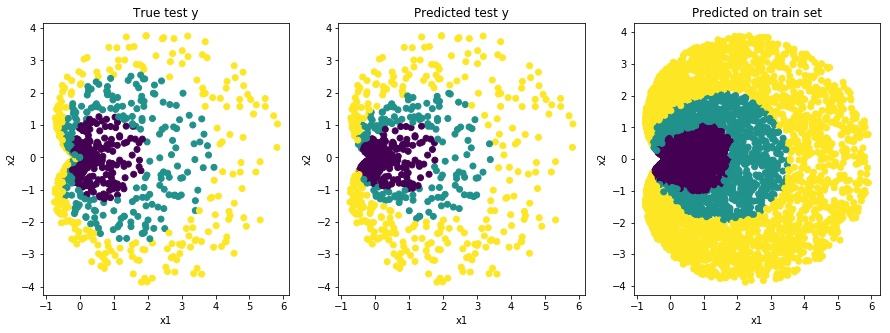

Epoch 800, Accuracy 0.68%


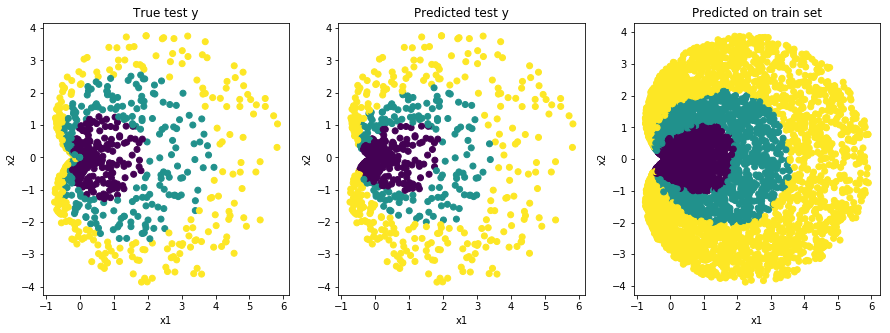

Epoch 1000, Accuracy 0.70%


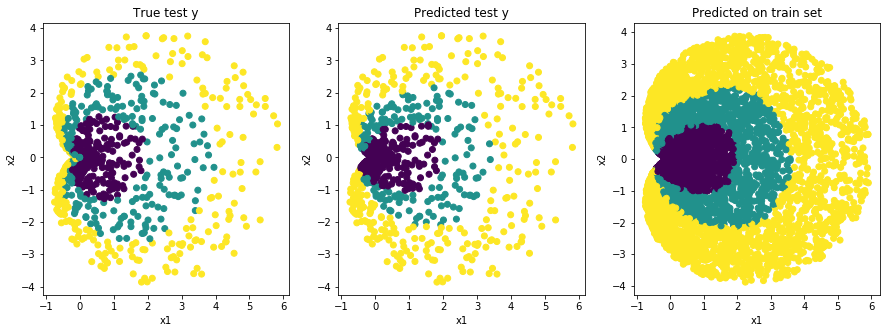

Epoch 1200, Accuracy 0.71%


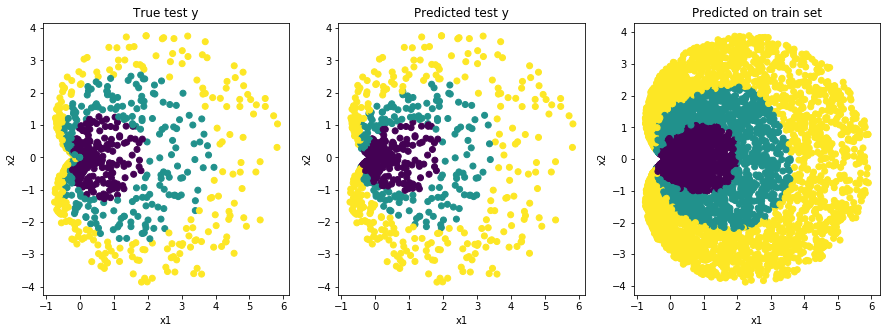

Epoch 1400, Accuracy 0.72%


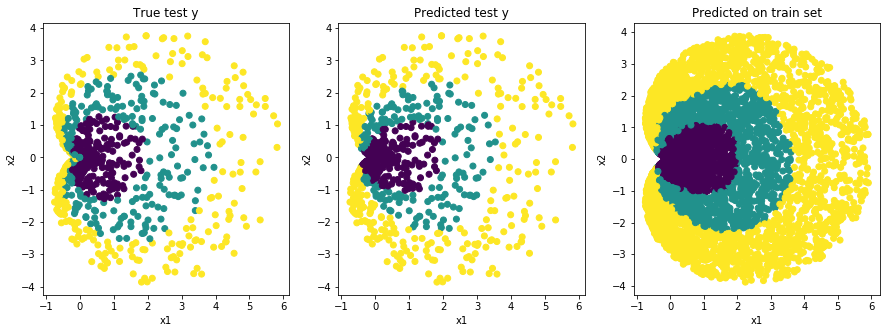

Epoch 1600, Accuracy 0.73%


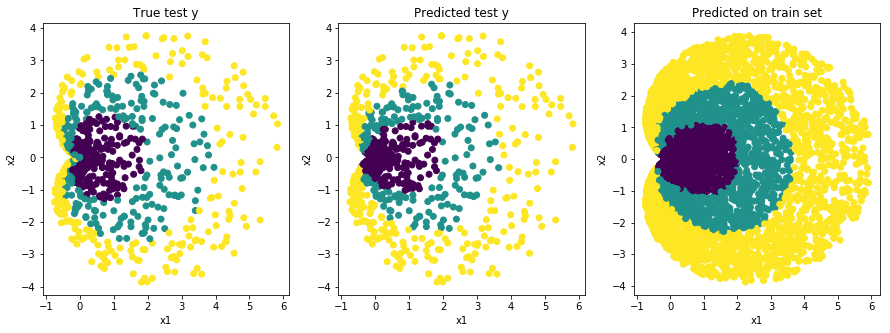

Epoch 1800, Accuracy 0.73%


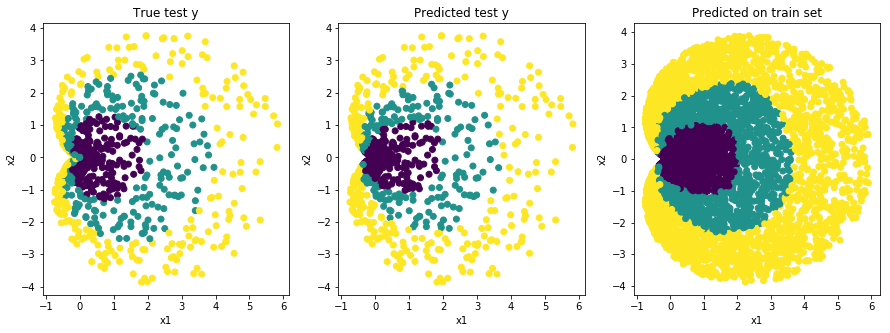

Epoch 2000, Accuracy 0.74%


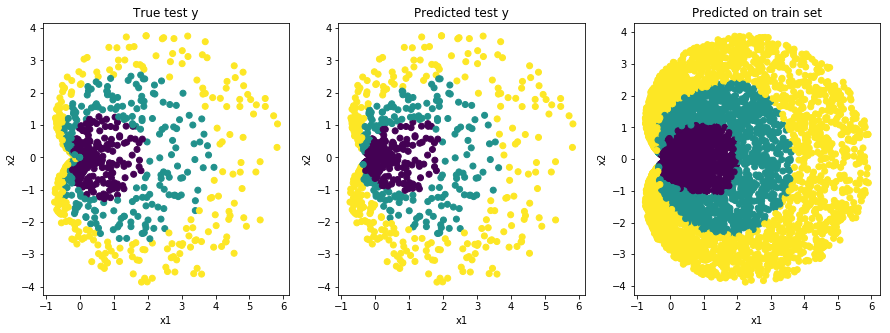

Epoch 2200, Accuracy 0.74%


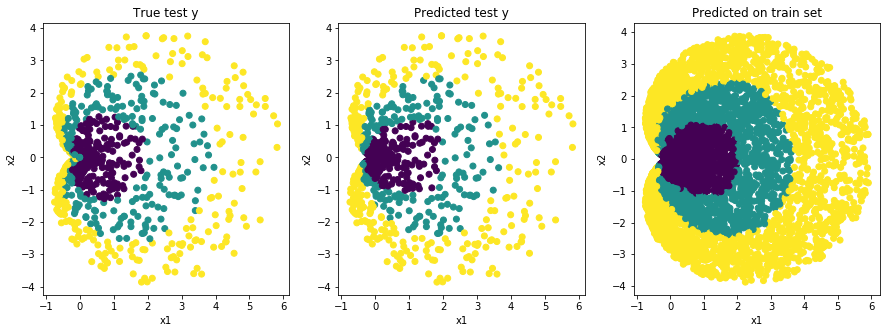

Epoch 2400, Accuracy 0.75%


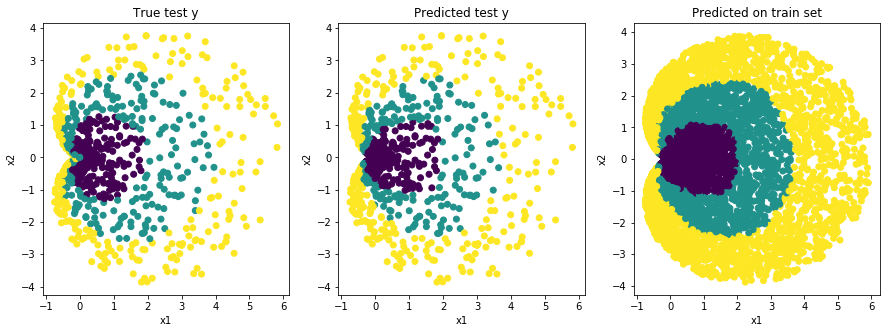

Epoch 2600, Accuracy 0.75%


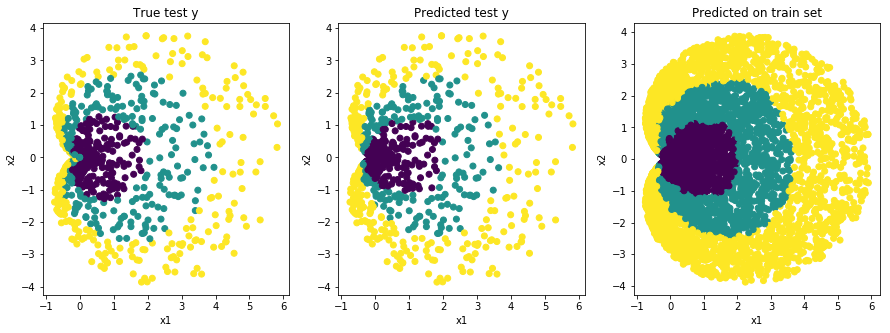

Epoch 2800, Accuracy 0.76%


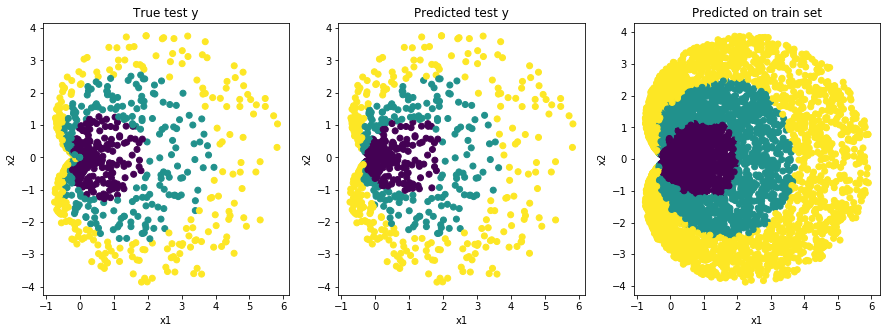

Epoch 3000, Accuracy 0.76%


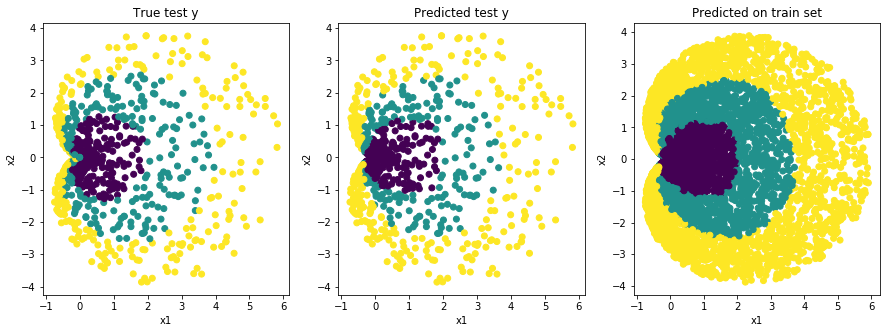

Epoch 3200, Accuracy 0.77%


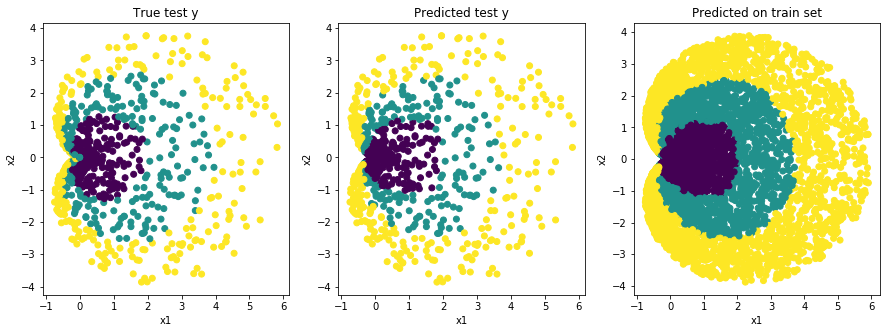

Epoch 3400, Accuracy 0.77%


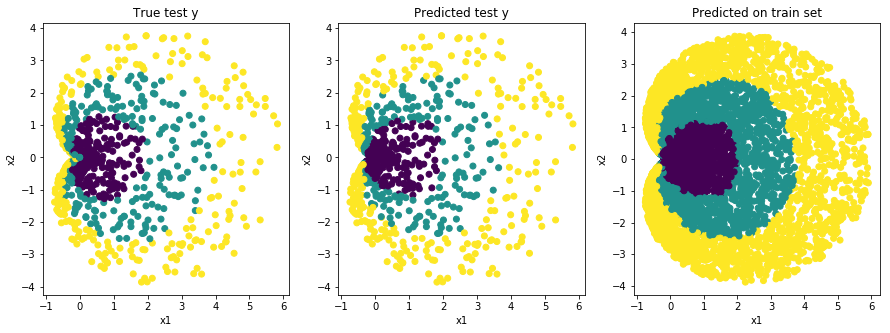

Epoch 3600, Accuracy 0.78%


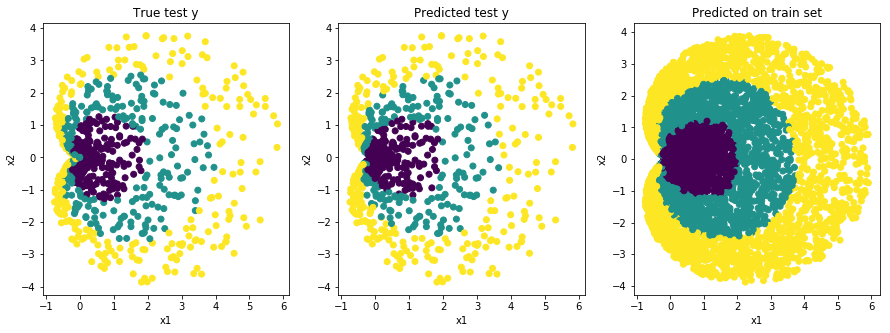

Epoch 3800, Accuracy 0.78%


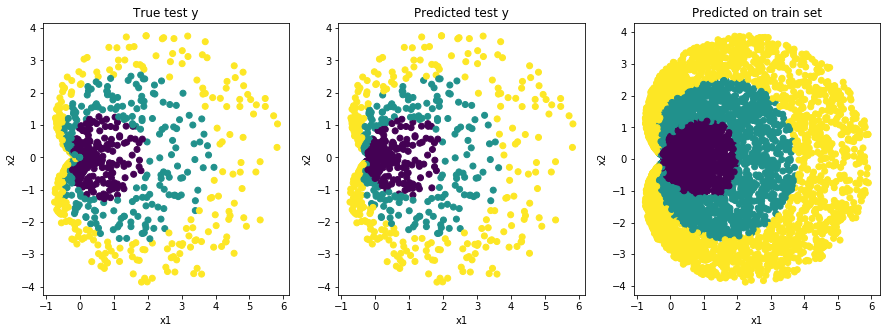

Epoch 4000, Accuracy 0.78%


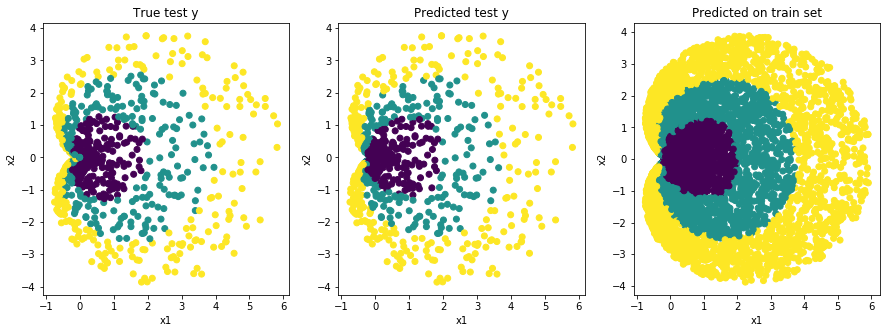

Epoch 4200, Accuracy 0.78%


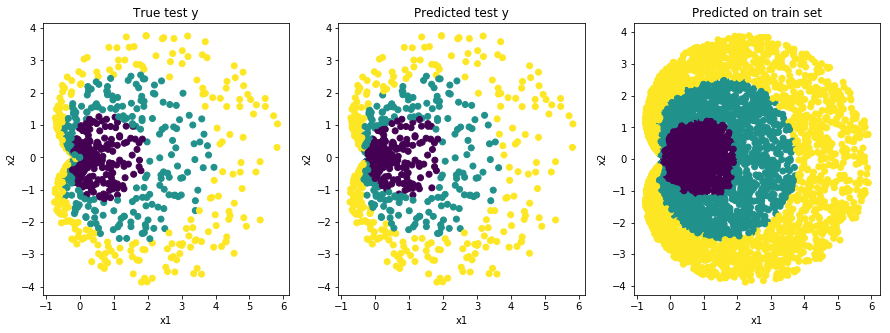

Epoch 4400, Accuracy 0.79%


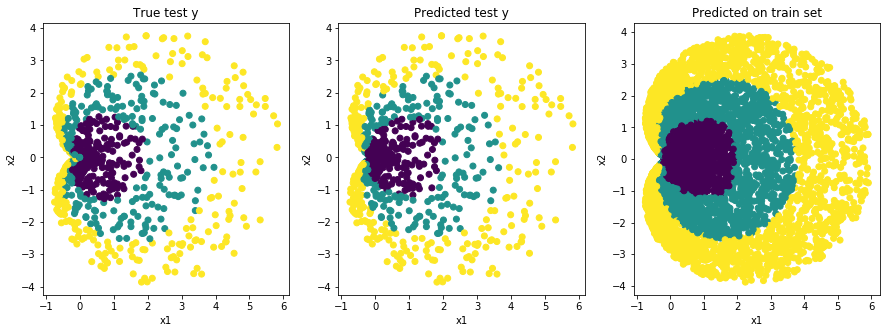

Epoch 4600, Accuracy 0.79%


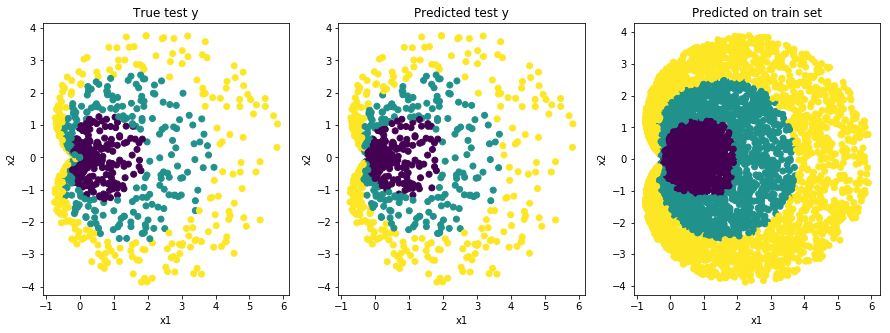

Epoch 4800, Accuracy 0.78%


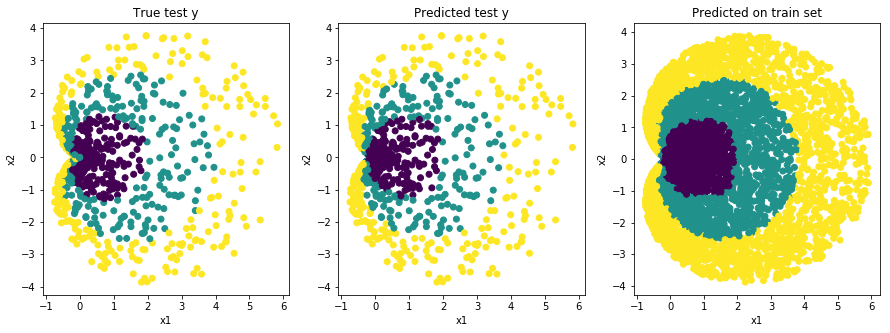

Epoch 5000, Accuracy 0.79%


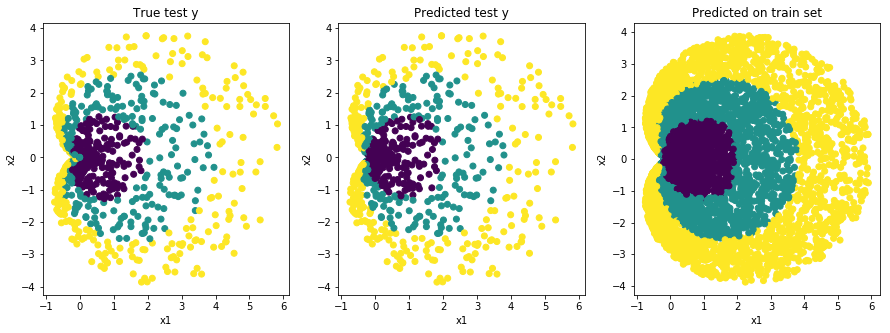

Epoch 5200, Accuracy 0.80%


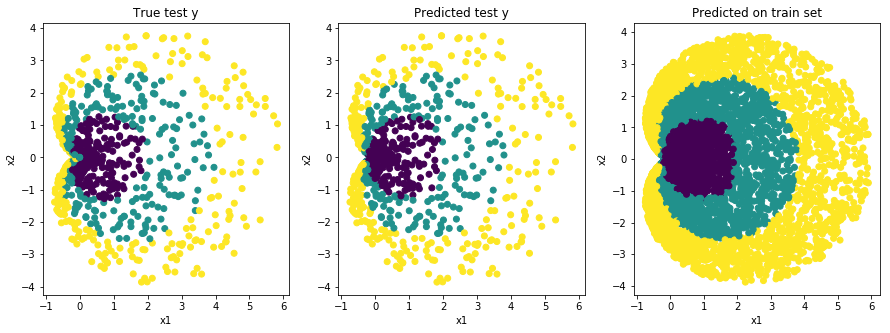

Epoch 5400, Accuracy 0.80%


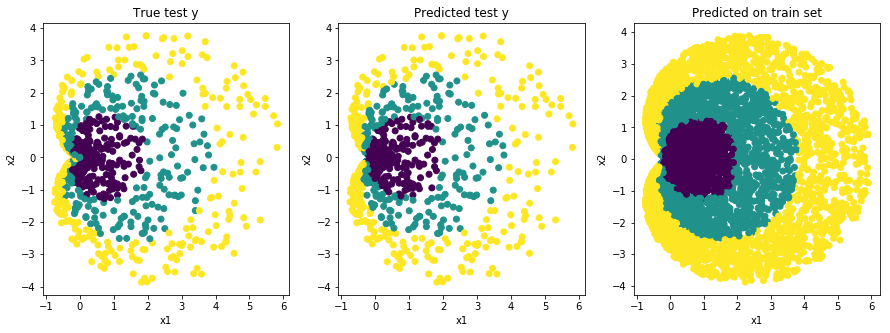

Epoch 5600, Accuracy 0.80%


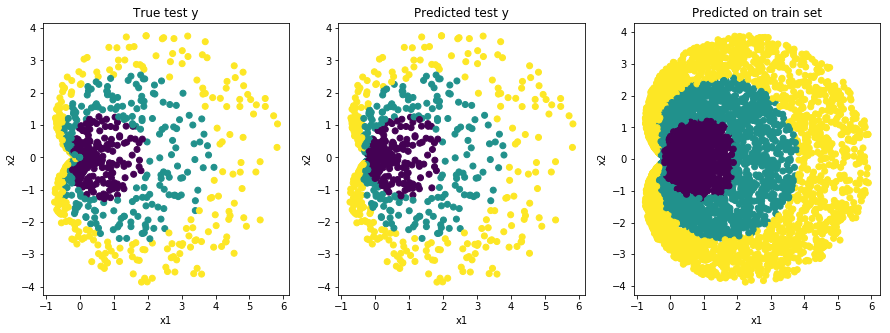

Epoch 5800, Accuracy 0.80%


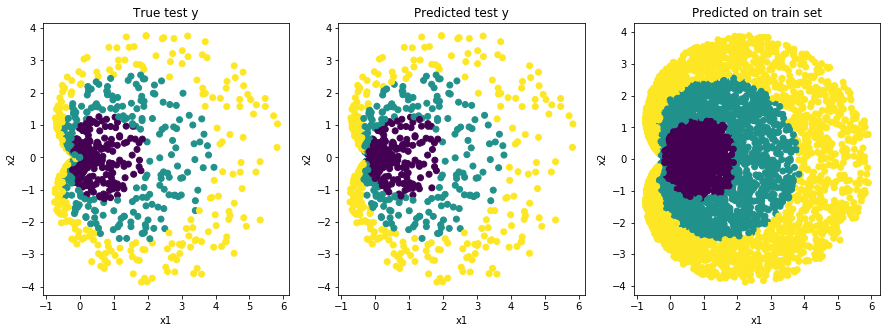

Epoch 6000, Accuracy 0.80%


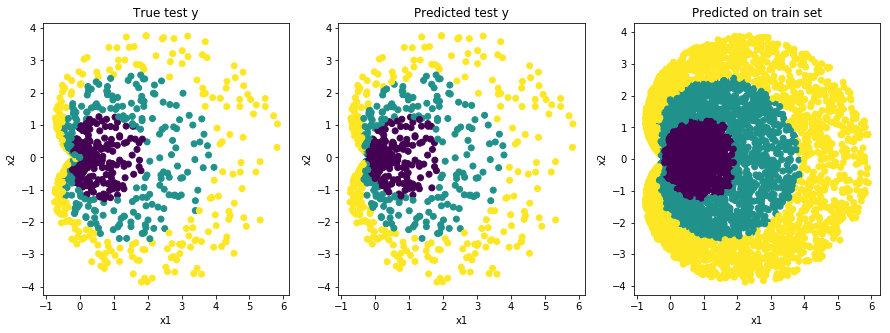

Epoch 6200, Accuracy 0.80%


In [ ]:
import torch.optim as optim
from sklearn.metrics import accuracy_score

model = MLPModel()

lr = 0.005
optimizer = optim.SGD(model.parameters(), lr= lr)

list_epoch = []
list_train_loss = []
list_val_loss = []
list_acc_epoch = []
list_acc = []

epoch = 8000
for i in range(epoch):
    #Train
    model.train()
    optimizer.zero_grad()
    
    input_x = torch.tensor(train_X, dtype=torch.float)    
    true_y = torch.tensor(train_y, dtype=torch.long)
    pred_y = model(input_x)    
    
    loss = criterion(pred_y, true_y)
    loss.backward()
    optimizer.step()
    list_epoch.append(i)
    list_train_loss.append(loss.item())
    
    #Validation
    model.eval()
    optimizer.zero_grad()
    input_x = torch.tensor(val_X, dtype=torch.float)    
    true_y = torch.tensor(val_y, dtype=torch.long)
    pred_y = model(input_x)
    loss = criterion(pred_y, true_y)
    list_val_loss.append(loss.item())
    
    if i % 200 == 0:
        # Calculate Accuracy
        model.eval()
        optimizer.zero_grad()
        input_x = torch.tensor(test_X, dtype=torch.float)
        true_y = torch.tensor(test_y, dtype=torch.long)
        pred_y = model(input_x).detach().max(dim=1)[1].numpy()
        acc = accuracy_score(true_y, pred_y)
        list_acc.append(acc)
        list_acc_epoch.append(i)
        
        fig = plt.figure(figsize=(15, 5))
        ax1 = fig.add_subplot(1, 3, 1)
        ax1.scatter(test_X[:, 0], test_X[:, 1], c=test_y)
        ax1.set_xlabel('x1')
        ax1.set_ylabel('x2')
        ax1.set_title('True test y')
        
        ax2 = fig.add_subplot(1, 3, 2)
        ax2.scatter(test_X[:, 0], test_X[:, 1], c=pred_y)
        ax2.set_xlabel('x1')
        ax2.set_ylabel('x2')
        ax2.set_title('Predicted test y')
        
        input_x = torch.tensor(train_X, dtype=torch.float)
        pred_y = model(input_x).detach().max(dim=1)[1].numpy()
        
        ax3 = fig.add_subplot(1, 3, 3)
        ax3.scatter(train_X[:, 0], train_X[:, 1], c=pred_y)
        ax3.set_xlabel('x1')
        ax3.set_ylabel('x2')
        ax3.set_title('Predicted on train set')
        
        plt.show()
        print("Epoch {0:}, Accuracy {1:2.2f}%".format(i, acc))
    

4. Report Experiment

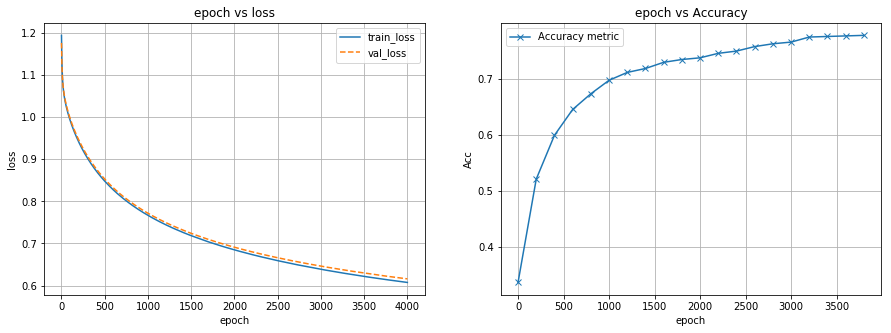

In [76]:
fig = plt.figure(figsize=(15, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(list_epoch, list_train_loss, label='train_loss')
ax1.plot(list_epoch, list_val_loss, '--', label='val_loss')
ax1.set_xlabel('epoch')
ax1.set_ylabel('loss')
ax1.grid()
ax1.legend()
ax1.set_title('epoch vs loss')

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(list_acc_epoch, list_acc, marker='x', label='Accuracy metric')
ax2.set_xlabel('epoch')
ax2.set_ylabel('Acc')
ax2.grid()
ax2.legend()
ax2.set_title('epoch vs Accuracy')

plt.show()
